# CSC 4422 DMML
## Project 1
### Zhuohao Tan
#### 03/02/2023

For this assignment you will practice with a real dataset to perform data cleaning, exploratory data analysis (EDA), and visualization tasks. The goal is not only to use the technical skills we’re developing, but also to think about why and when different approaches make sense. With this end in mind, you’ll be prompted below to write code to perform various tasks, and also to write English in text cells to discuss/justify why you took the steps you did.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=18t5IYN05Oh6mfNvyW5KhUgdCgt5eZUfq')
df.head(5)

,sid,store_url,store_uscore,published_store,name,description,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre
0,10,https://store.steampowered.com/app/10,97.0,2000-11-01,Counter-Strike,Play the world's number 1 online action game. ...,999.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.90,64.5,15000000.0,Action
1,20,https://store.steampowered.com/app/20,84.0,1999-04-01,Team Fortress Classic,One of the most popular online action games of...,499.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.47,50.6,3500000.0,Action
2,30,https://store.steampowered.com/app/30,90.0,2003-05-01,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,499.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain",Just Right-Tough,3.69,53.1,7500000.0,Action
3,40,https://store.steampowered.com/app/40,82.0,2001-06-01,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,499.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.15,2.9,7500000.0,Action
4,50,https://store.steampowered.com/app/50,95.0,1999-11-01,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,499.0,NaN,"WIN,MAC,LNX","English,French,German,Korean",Just Right,3.88,10.7,7500000.0,Action


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sid              13491 non-null  int64  
 1   store_url        13491 non-null  object 
 2   store_uscore     13336 non-null  float64
 3   published_store  13426 non-null  object 
 4   name             13491 non-null  object 
 5   description      13474 non-null  object 
 6   full_price       13491 non-null  object 
 7   discount         741 non-null    float64
 8   platforms        13491 non-null  object 
 9   languages        13490 non-null  object 
 10  gfq_difficulty   12320 non-null  object 
 11  gfq_rating       13491 non-null  float64
 12  gfq_length       10688 non-null  float64
 13  stsp_owners      13491 non-null  float64
 14  genre            13491 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.5+ MB


In [4]:
df.nunique()

sid                13491
store_url          13491
store_uscore          99
published_store     2741
name               13458
description        13471
full_price            77
discount              42
platforms              6
languages           3213
gfq_difficulty         9
gfq_rating           339
gfq_length           715
stsp_owners           13
genre                 15
dtype: int64

In [5]:
df.describe()

,sid,store_uscore,discount,gfq_rating,gfq_length,stsp_owners
count,1.349100e+04,13336.000000,741.000000,13491.000000,10688.000000,1.349100e+04
mean,4.737435e+05,74.030744,61.916329,3.333742,17.653518,2.889378e+05
std,2.673593e+05,18.359725,20.786977,0.856304,19.255722,2.277062e+06
min,1.000000e+01,1.000000,10.000000,0.500000,0.500000,1.000000e+04
25%,3.071800e+05,64.000000,50.000000,3.000000,5.000000,1.000000e+04
50%,4.256000e+05,79.000000,60.000000,3.500000,10.400000,3.500000e+04
75%,6.120000e+05,88.000000,80.000000,3.920000,20.300000,1.500000e+05
max,1.265970e+06,100.000000,90.000000,5.000000,80.000000,1.500000e+08


The following columns should be deleted since sid, store_url, name are complete unique. Therefore you are not going to be useful in data analysis. Description is is very unique and it is not able to tell us about some pattern. Therefore, it should be deleted.

# Data Cleanning

### Dropping Data

In [6]:
df = df.drop(['sid', 'store_url', 'name', 'description'], axis=1)

In [7]:
df.head()

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre
0,97.0,2000-11-01,999.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.90,64.5,15000000.0,Action
1,84.0,1999-04-01,499.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.47,50.6,3500000.0,Action
2,90.0,2003-05-01,499.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain",Just Right-Tough,3.69,53.1,7500000.0,Action
3,82.0,2001-06-01,499.0,NaN,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.15,2.9,7500000.0,Action
4,95.0,1999-11-01,499.0,NaN,"WIN,MAC,LNX","English,French,German,Korean",Just Right,3.88,10.7,7500000.0,Action


In [8]:
df.duplicated().sum()

1

In [9]:
df.isna().sum()

store_uscore         155
published_store       65
full_price             0
discount           12750
platforms              0
languages              1
gfq_difficulty      1171
gfq_rating             0
gfq_length          2803
stsp_owners            0
genre                  0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_uscore     13336 non-null  float64
 1   published_store  13426 non-null  object 
 2   full_price       13491 non-null  object 
 3   discount         741 non-null    float64
 4   platforms        13491 non-null  object 
 5   languages        13490 non-null  object 
 6   gfq_difficulty   12320 non-null  object 
 7   gfq_rating       13491 non-null  float64
 8   gfq_length       10688 non-null  float64
 9   stsp_owners      13491 non-null  float64
 10  genre            13491 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


### Missing Values

In [11]:
df.full_price = df.full_price.replace('free', 0)

df.published_store = pd.to_datetime(df.published_store)
df.full_price = pd.to_numeric(df.full_price)

In [12]:
df['gfq_length'] = df['gfq_length'].fillna(df['gfq_length'].mean())
df['discount'] = df['discount'].fillna(0)

I filled in the null value for store uscore and gfq_length with their mean value, since using the mean will not mess up data too much compare to all other values.

I filled in 0 for the null values in discount, because it is reasonable that there are no discounts sometime.

In [13]:
df['published_store'] = df['published_store'].replace(np.nan, df['published_store'].mode()[0])

I filled in store_uscore with the its mode, which is the date that appeared the most in the data. It will be a high chance that the missing date will match up with the most popular date to publish games.

In [14]:
df['languages'] = df['languages'].fillna(df['languages'].mode()[0])
df['gfq_difficulty'] = df['gfq_difficulty'].fillna('Unknow')

I filled in language with the its mode, which is the languages that appeared the most in the data. It will be a high chance that the missing languages will match up with the most popular languanges. 

I filled in the missing value of gfq_difficulty with unknow, since there are relatively high number of missing value. Therefore, I think It would be great to group those game togehter with unknow. 


In [15]:
df.head()

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre
0,97.0,2000-11-01,999.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.90,64.5,15000000.0,Action
1,84.0,1999-04-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.47,50.6,3500000.0,Action
2,90.0,2003-05-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain",Just Right-Tough,3.69,53.1,7500000.0,Action
3,82.0,2001-06-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",Just Right-Tough,3.15,2.9,7500000.0,Action
4,95.0,1999-11-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Korean",Just Right,3.88,10.7,7500000.0,Action


### Ordinal Encoding

In [16]:
df['gfq_difficulty'].unique()

array(['Just Right-Tough', 'Just Right', 'Easy-Just Right', 'Tough',
       'Unknow', 'Tough-Unforgiving', 'Unforgiving', 'Easy', 'Simple',
       'Simple-Easy'], dtype=object)

In [17]:
diff_map = {'Just Right-Tough':6, 'Just Right':5, 'Easy-Just Right':4, 'Tough':7,'Unknow':0, 'Tough-Unforgiving':8, 'Unforgiving':9, 'Easy':3, 'Simple':1,'Simple-Easy':2}
df['gfq_difficulty'] = df['gfq_difficulty'].map(diff_map)
df

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre
0,97.0,2000-11-01,999.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.90,64.500000,15000000.0,Action
1,84.0,1999-04-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.47,50.600000,3500000.0,Action
2,90.0,2003-05-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain",6,3.69,53.100000,7500000.0,Action
3,82.0,2001-06-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.15,2.900000,7500000.0,Action
4,95.0,1999-11-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Korean",5,3.88,10.700000,7500000.0,Action
...,...,...,...,...,...,...,...,...,...,...,...
13486,67.0,2020-03-06,1399.0,0.0,WIN,English,3,3.50,2.000000,10000.0,Adventure
13487,88.0,2020-04-03,1999.0,0.0,WIN,English,5,4.00,17.653518,10000.0,Early Access
13488,NaN,2020-03-27,1999.0,0.0,WIN,English,0,0.50,17.653518,10000.0,Early Access
13489,67.0,2020-03-24,299.0,0.0,"WIN,MAC,LNX",English,3,3.00,0.500000,10000.0,Indie


### Discretization

In [18]:
df['stsp_owners'] = pd.cut(df.stsp_owners, bins=3, labels=['1', '2', '3'])
df.head()

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre
0,97.0,2000-11-01,999.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.90,64.5,1,Action
1,84.0,1999-04-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.47,50.6,1,Action
2,90.0,2003-05-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain",6,3.69,53.1,1,Action
3,82.0,2001-06-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.15,2.9,1,Action
4,95.0,1999-11-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Korean",5,3.88,10.7,1,Action


### Muiti-Value Columns

In [19]:
def sep(platfroms, platfrom):
  return platfroms.split(',').count(platfrom)


df['windows'] = df['platforms'].apply(sep, platfrom='WIN')
df['Mac'] = df['platforms'].apply(sep, platfrom='MAC')
df['linux'] = df['platforms'].apply(sep, platfrom='LNX')

In [20]:
df

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux
0,97.0,2000-11-01,999.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.90,64.500000,1,Action,1,1,1
1,84.0,1999-04-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.47,50.600000,1,Action,1,1,1
2,90.0,2003-05-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain",6,3.69,53.100000,1,Action,1,1,1
3,82.0,2001-06-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Italian,Spanish - Spain,...",6,3.15,2.900000,1,Action,1,1,1
4,95.0,1999-11-01,499.0,0.0,"WIN,MAC,LNX","English,French,German,Korean",5,3.88,10.700000,1,Action,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13486,67.0,2020-03-06,1399.0,0.0,WIN,English,3,3.50,2.000000,1,Adventure,1,0,0
13487,88.0,2020-04-03,1999.0,0.0,WIN,English,5,4.00,17.653518,1,Early Access,1,0,0
13488,NaN,2020-03-27,1999.0,0.0,WIN,English,0,0.50,17.653518,1,Early Access,1,0,0
13489,67.0,2020-03-24,299.0,0.0,"WIN,MAC,LNX",English,3,3.00,0.500000,1,Indie,1,1,1


I think Yes and NO. This step is not the same as one-hot encoding beucase if you use get_dummies insetead, it will return a different things. However, I think this way is better than use get_dummies. The idea of this step is same as one-hot encoding which converts a categorical attribute to a binary varuables. 

In [21]:
def count_lang(string):
  return len(string.split(","))

df['languages'] = df['languages'].apply(count_lang)

In [22]:
df.head()

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux
0,97.0,2000-11-01,999.0,0.0,"WIN,MAC,LNX",8,6,3.90,64.5,1,Action,1,1,1
1,84.0,1999-04-01,499.0,0.0,"WIN,MAC,LNX",9,6,3.47,50.6,1,Action,1,1,1
2,90.0,2003-05-01,499.0,0.0,"WIN,MAC,LNX",5,6,3.69,53.1,1,Action,1,1,1
3,82.0,2001-06-01,499.0,0.0,"WIN,MAC,LNX",9,6,3.15,2.9,1,Action,1,1,1
4,95.0,1999-11-01,499.0,0.0,"WIN,MAC,LNX",4,5,3.88,10.7,1,Action,1,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   store_uscore     13336 non-null  float64       
 1   published_store  13491 non-null  datetime64[ns]
 2   full_price       13491 non-null  float64       
 3   discount         13491 non-null  float64       
 4   platforms        13491 non-null  object        
 5   languages        13491 non-null  int64         
 6   gfq_difficulty   13491 non-null  int64         
 7   gfq_rating       13491 non-null  float64       
 8   gfq_length       13491 non-null  float64       
 9   stsp_owners      13491 non-null  category      
 10  genre            13491 non-null  object        
 11  windows          13491 non-null  int64         
 12  Mac              13491 non-null  int64         
 13  linux            13491 non-null  int64         
dtypes: category(1), datetime64[ns](1), flo

### Price Column

In [24]:
df['price'] = df['full_price'] - df['discount']
df['price'] /= 100
df

,store_uscore,published_store,full_price,discount,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux,price
0,97.0,2000-11-01,999.0,0.0,"WIN,MAC,LNX",8,6,3.90,64.500000,1,Action,1,1,1,9.99
1,84.0,1999-04-01,499.0,0.0,"WIN,MAC,LNX",9,6,3.47,50.600000,1,Action,1,1,1,4.99
2,90.0,2003-05-01,499.0,0.0,"WIN,MAC,LNX",5,6,3.69,53.100000,1,Action,1,1,1,4.99
3,82.0,2001-06-01,499.0,0.0,"WIN,MAC,LNX",9,6,3.15,2.900000,1,Action,1,1,1,4.99
4,95.0,1999-11-01,499.0,0.0,"WIN,MAC,LNX",4,5,3.88,10.700000,1,Action,1,1,1,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13486,67.0,2020-03-06,1399.0,0.0,WIN,1,3,3.50,2.000000,1,Adventure,1,0,0,13.99
13487,88.0,2020-04-03,1999.0,0.0,WIN,1,5,4.00,17.653518,1,Early Access,1,0,0,19.99
13488,NaN,2020-03-27,1999.0,0.0,WIN,1,0,0.50,17.653518,1,Early Access,1,0,0,19.99
13489,67.0,2020-03-24,299.0,0.0,"WIN,MAC,LNX",1,3,3.00,0.500000,1,Indie,1,1,1,2.99


In [25]:
df = df.drop(['discount', 'full_price'], axis=1)

In [26]:
df.describe()

,store_uscore,languages,gfq_difficulty,gfq_rating,gfq_length,windows,Mac,linux,price
count,13336.000000,13491.000000,13491.000000,13491.000000,13491.000000,13491.000000,13491.000000,13491.000000,13491.000000
mean,74.030744,4.130680,4.677118,3.333742,17.653518,0.999852,0.373582,0.252539,9.916278
std,18.359725,4.690737,2.145755,0.856304,17.138852,0.012175,0.483773,0.434485,10.246546
min,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,1.000000,4.000000,3.000000,6.500000,1.000000,0.000000,0.000000,2.990000
50%,79.000000,2.000000,5.000000,3.500000,14.400000,1.000000,0.000000,0.000000,7.990000
75%,88.000000,6.000000,6.000000,3.920000,17.653518,1.000000,1.000000,1.000000,14.240000
max,100.000000,29.000000,9.000000,5.000000,80.000000,1.000000,1.000000,1.000000,199.990000


### Price Outliers

In [27]:
df['price'].sort_values(ascending=False)

13483    199.99
2135     129.09
10227    100.00
7909      89.19
977       89.19
          ...  
11614      0.00
5722       0.00
1290       0.00
8651       0.00
4257       0.00
Name: price, Length: 13491, dtype: float64

In [28]:
df = df[df['price']<120]

In [29]:
df['price'].sort_values()

7516       0.00
5320       0.00
6080       0.00
1325       0.00
3041       0.00
          ...  
977       89.19
978       89.19
7645      89.19
7909      89.19
10227    100.00
Name: price, Length: 13489, dtype: float64

There are outliers in the price column, the price of 199.99 and 129 since those value is singificantly larger than the mean value, which affecting the rest of the price value in the dataset. Therefore I deleted them from the data. However, 0 is not consider to be a outlier because it is reasonable that there are some free games on STEM.

In [30]:
df['gfq_rating'] = (df['gfq_rating'] - df['gfq_rating'].min()) / (df['gfq_rating'].max() - df['gfq_rating'].min())
df['store_uscore'] = (df['store_uscore'] - df['store_uscore'].min()) / (df['store_uscore'].max() - df['store_uscore'].min())
df.head();

<ipython-input-30-c718b52db6a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gfq_rating'] = (df['gfq_rating'] - df['gfq_rating'].min()) / (df['gfq_rating'].max() - df['gfq_rating'].min())
<ipython-input-30-c718b52db6a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['store_uscore'] = (df['store_uscore'] - df['store_uscore'].min()) / (df['store_uscore'].max() - df['store_uscore'].min())


### New Age Column

In [31]:
from datetime import datetime

df['age'] = datetime.now().year - df['published_store'].dt.year
df.age.unique();

<ipython-input-31-1f0435274217>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = datetime.now().year - df['published_store'].dt.year


In [32]:
df.head()

,store_uscore,published_store,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux,price,age
0,0.969697,2000-11-01,"WIN,MAC,LNX",8,6,0.755556,64.5,1,Action,1,1,1,9.99,23
1,0.838384,1999-04-01,"WIN,MAC,LNX",9,6,0.660000,50.6,1,Action,1,1,1,4.99,24
2,0.898990,2003-05-01,"WIN,MAC,LNX",5,6,0.708889,53.1,1,Action,1,1,1,4.99,20
3,0.818182,2001-06-01,"WIN,MAC,LNX",9,6,0.588889,2.9,1,Action,1,1,1,4.99,22
4,0.949495,1999-11-01,"WIN,MAC,LNX",4,5,0.751111,10.7,1,Action,1,1,1,4.99,24


# Data Visualization

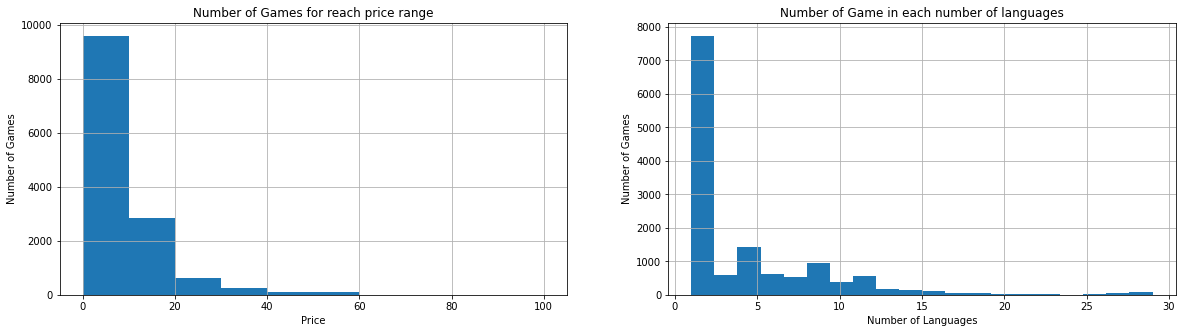

In [33]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20,5))

df.price.hist(ax=ax0, bins=10)
df.languages.hist(ax=ax1, bins=20)

ax0.set_title('Number of Games for reach price range')
ax1.set_title('Number of Game in each number of languages')
ax0.set_ylabel("Number of Games")
ax1.set_ylabel("Number of Games")
ax0.set_xlabel("Price")
ax1.set_xlabel("Number of Languages");

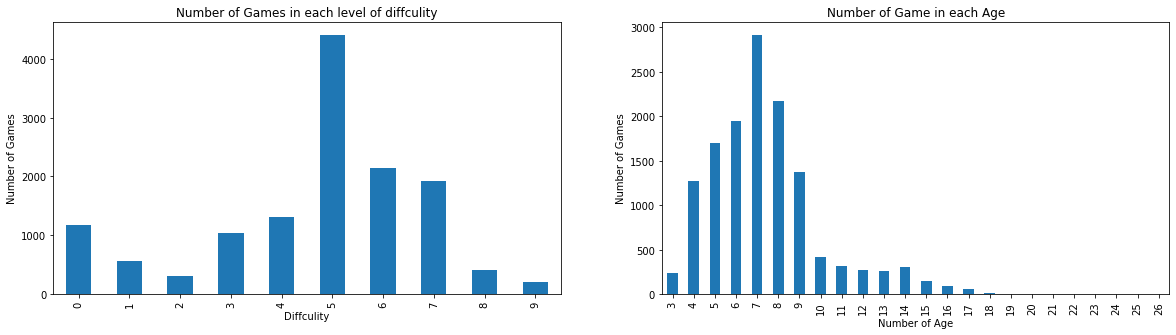

In [34]:
tmp = df.gfq_difficulty.value_counts().sort_index()
tmp1 = df.age.value_counts().sort_index()


fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20,5))

tmp.plot(kind='bar', ax=ax0)
tmp1.plot(kind='bar', ax=ax1)

ax0.set_title('Number of Games in each level of diffculity')
ax1.set_title('Number of Game in each Age')
ax0.set_ylabel("Number of Games")
ax1.set_ylabel("Number of Games")
ax0.set_xlabel("Diffculity")
ax1.set_xlabel("Number of Age");


In [35]:
win = df.windows.sum()
mac = df.Mac.sum()
lnx = df.linux.sum()

Text(0, 0.5, 'Frequency')

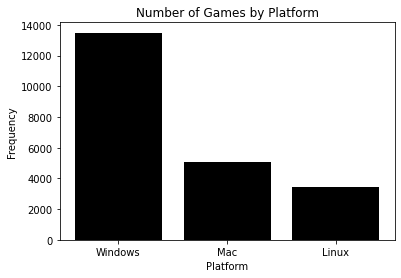

In [36]:
fig, ax = plt.subplots()

ax.bar(['Windows', 'Mac', 'Linux'], [win, mac, lnx], color='black')
ax.set_title('Number of Games by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Frequency')

In [37]:
df.head()

,store_uscore,published_store,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux,price,age
0,0.969697,2000-11-01,"WIN,MAC,LNX",8,6,0.755556,64.5,1,Action,1,1,1,9.99,23
1,0.838384,1999-04-01,"WIN,MAC,LNX",9,6,0.660000,50.6,1,Action,1,1,1,4.99,24
2,0.898990,2003-05-01,"WIN,MAC,LNX",5,6,0.708889,53.1,1,Action,1,1,1,4.99,20
3,0.818182,2001-06-01,"WIN,MAC,LNX",9,6,0.588889,2.9,1,Action,1,1,1,4.99,22
4,0.949495,1999-11-01,"WIN,MAC,LNX",4,5,0.751111,10.7,1,Action,1,1,1,4.99,24


<AxesSubplot:>

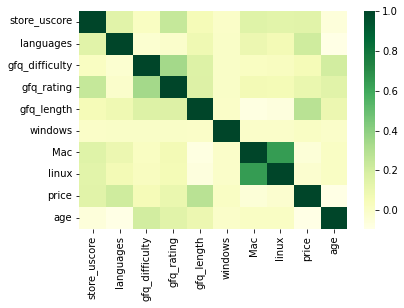

In [38]:
corr = df.corr()

sns.heatmap(corr, cbar=True, cmap='YlGn')

Based on the heatmap above the top 5 correlation includes: MAX-LNX, price-length, rating-diffculity, rating-score, language-price. 

* **MAX-LNX:** This might mean both of the system are very similar. Therefore, when a game is avilable on MAX, there is a high chacne that you can play it on LNX as well.

* **price-length:** This correlation shows, the longer the game is, the more expensive it is. 

* **rating-diffculity:** This correlatinon shows that more people tend to like playing diffcult games. The more diffcult tends to have a higher rating for the game. 

* **language-price:** This correlation show that the more languauges contains in a games, the more expensive the game going to be. It may because of the game is bigger and popular. 

* rating-score: This have a strong correlation, which make sense, one is the rating of the game out of 100, that the other one is from the gameFAQ site, with the rating out of 5. Since they are both rating of the game, it make sense that they have a strong positive correlation. 

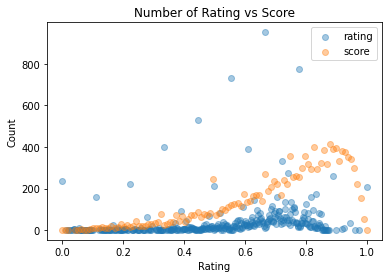

In [39]:
fig, ax = plt.subplots()
tmp = df.gfq_rating.value_counts().reset_index()
tmp1 = df.store_uscore.value_counts().reset_index()

ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], alpha=0.4, label='rating')
ax.scatter(tmp1.iloc[:,0], tmp1.iloc[:,1], alpha=0.4, label='score')
ax.set_title('Number of Rating vs Score')
ax.set_ylabel('Count')
ax.set_xlabel('Rating')
ax.legend();

The graph above shows a week positive correlation between rating and score. It is related to the correlation heatmap above beucase both of them showing a week correlation between score and rating. 

In [40]:
df.head()

,store_uscore,published_store,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux,price,age
0,0.969697,2000-11-01,"WIN,MAC,LNX",8,6,0.755556,64.5,1,Action,1,1,1,9.99,23
1,0.838384,1999-04-01,"WIN,MAC,LNX",9,6,0.660000,50.6,1,Action,1,1,1,4.99,24
2,0.898990,2003-05-01,"WIN,MAC,LNX",5,6,0.708889,53.1,1,Action,1,1,1,4.99,20
3,0.818182,2001-06-01,"WIN,MAC,LNX",9,6,0.588889,2.9,1,Action,1,1,1,4.99,22
4,0.949495,1999-11-01,"WIN,MAC,LNX",4,5,0.751111,10.7,1,Action,1,1,1,4.99,24


In [41]:
tmp = df.groupby('genre')['price'].mean().sort_values(ascending=False)
tmp

genre
Sports                   13.686990
RPG                      13.355720
Simulation               12.246651
Racing                   12.120776
Strategy                 11.637793
Action                   11.328387
Adventure                10.574750
Early Access             10.153295
Violent                   7.830556
Indie                     7.777197
Casual                    6.554173
Gore                      5.321538
Sexual Content            5.171500
Massively Multiplayer     3.979060
Free to Play              0.000000
Name: price, dtype: float64

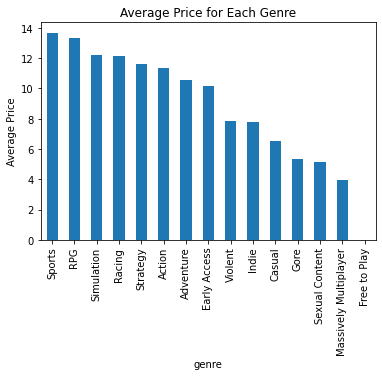

In [42]:
fig, ax = plt.subplots()

tmp.plot(kind='bar', ax=ax);
ax.set_title('Average Price for Each Genre')
ax.set_ylabel('Average Price');

In [43]:
df.head()

,store_uscore,published_store,platforms,languages,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,genre,windows,Mac,linux,price,age
0,0.969697,2000-11-01,"WIN,MAC,LNX",8,6,0.755556,64.5,1,Action,1,1,1,9.99,23
1,0.838384,1999-04-01,"WIN,MAC,LNX",9,6,0.660000,50.6,1,Action,1,1,1,4.99,24
2,0.898990,2003-05-01,"WIN,MAC,LNX",5,6,0.708889,53.1,1,Action,1,1,1,4.99,20
3,0.818182,2001-06-01,"WIN,MAC,LNX",9,6,0.588889,2.9,1,Action,1,1,1,4.99,22
4,0.949495,1999-11-01,"WIN,MAC,LNX",4,5,0.751111,10.7,1,Action,1,1,1,4.99,24


In [44]:
tmp = df['age'].value_counts().sort_index(ascending=False)

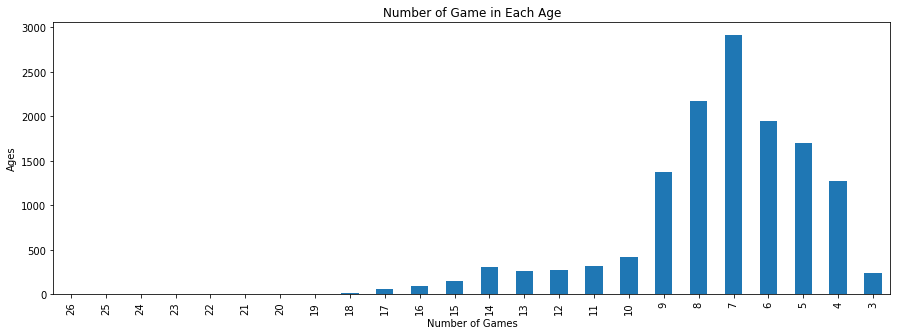

In [45]:
fig, ax = plt.subplots(figsize=(15,5))

tmp.plot.bar(ax=ax)
ax.set_title('Number of Game in Each Age')
ax.set_xlabel('Number of Games')
ax.set_ylabel('Ages');

The graph above shows the age of games in STEM. As we can tell, the numbers of game is incresing from 26 yrs ago to 7 years ago. There is a growth in game development. Espcially when it was 7 years ago. However, growth of game development started to decrease since 6 yrs ago. It might because of many people are still playing the old games, The demand of the new games might not be huge. Therefore, the growth of game development start decreasing. 